#**For City T**

In [ ]:
!pip install gdown
import gdown
url = "https://drive.google.com/drive/folders/18Ch6KvqJ64DYEBs-_TnwwVI0Z5Lqidqk?usp=sharing"
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/Multi-step forecasting in multivariate time series data/B_test.csv',
 '/content/Multi-step forecasting in multivariate time series data/B_train.csv',
 '/content/Multi-step forecasting in multivariate time series data/G_test.csv',
 '/content/Multi-step forecasting in multivariate time series data/G_train.csv',
 '/content/Multi-step forecasting in multivariate time series data/Readme.pdf',
 '/content/Multi-step forecasting in multivariate time series data/S_test.csv',
 '/content/Multi-step forecasting in multivariate time series data/S_train.csv',
 '/content/Multi-step forecasting in multivariate time series data/T_test.csv',
 '/content/Multi-step forecasting in multivariate time series data/T_train.csv']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout ,GRU

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Multi-step forecasting in multivariate time series data/T_train.csv')
df

,Unnamed: 0,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
0,2014-05-01 00:00:00,0.0,0.568627,0.475410,0.56,0.133333,23.0,0.164141,0.123932,0.088222,0.277929,0.114228,81.0
1,2014-05-01 01:00:00,0.0,0.549020,0.475410,0.59,0.116667,23.0,0.194444,0.136752,0.116895,0.245232,0.114228,88.0
2,2014-05-01 02:00:00,0.0,0.549020,0.475410,0.61,0.200000,3.0,0.190657,0.183761,0.149978,0.231608,0.148297,98.0
3,2014-05-01 03:00:00,0.0,0.509804,0.459016,0.66,0.058333,23.0,0.190657,0.162393,0.107442,0.258856,0.156313,117.0
4,2014-05-01 04:00:00,0.0,0.529412,0.459016,0.63,0.083333,23.0,0.175505,0.200855,0.112988,0.217984,0.198397,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,2015-02-16 18:00:00,0.0,0.372549,0.606557,0.27,0.196759,14.0,0.200758,0.072650,0.071145,0.062670,0.074148,43.0
7003,2015-02-16 19:00:00,0.0,0.372549,0.639344,0.28,0.133333,14.0,0.171717,0.085470,0.074611,0.046322,0.060120,35.0
7004,2015-02-16 20:00:00,0.0,0.372549,0.639344,0.28,0.133333,14.0,0.126263,0.115385,0.090995,0.038147,0.094188,39.0
7005,2015-02-16 21:00:00,0.0,0.352941,0.639344,0.26,0.091667,14.0,0.084596,0.141026,0.080030,0.029973,0.106212,36.0


In [ ]:
df.describe()

,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
count,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000
mean,2.064364,0.509888,0.588999,0.568858,0.173264,15.168260,0.173658,0.184302,0.114327,0.156903,0.064573,91.248323
std,3.590754,0.226706,0.170793,0.253219,0.110123,8.096942,0.123176,0.121809,0.081558,0.157714,0.067672,77.447274
min,0.000000,0.039216,0.213115,0.000000,0.000000,0.000000,0.001263,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.294118,0.426230,0.360000,0.100000,13.000000,0.083333,0.094017,0.061661,0.029973,0.022044,35.000000
50%,1.000000,0.568627,0.573770,0.570000,0.150000,14.000000,0.145202,0.153846,0.096603,0.108992,0.044088,71.000000
75%,2.000000,0.686275,0.737705,0.780000,0.225000,23.000000,0.227273,0.252137,0.144307,0.234332,0.082164,124.000000
max,16.000000,1.000000,1.000000,0.990000,1.000000,24.000000,1.000000,0.931624,1.000000,0.882834,1.000000,609.000000


In [ ]:
df.isnull().sum()

Unnamed: 0            0
weather               0
temperature           0
pressure              0
humidity              0
wind_speed            0
wind_direction        0
PM10_Concentration    0
NO2_Concentration     0
CO_Concentration      0
O3_Concentration      0
SO2_Concentration     0
PM25_Concentration    0
dtype: int64

In [ ]:
# Assuming your DataFrame is named df
# Replace 'PM25_Concentration' with the column name you want to predict
target_column = 'PM25_Concentration'

# Extract features and target variable
features = df.drop(columns=['Unnamed: 0', target_column], axis=1)
target = df[target_column]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

In [ ]:
test_df = pd.read_csv('/content/Multi-step forecasting in multivariate time series data/T_test.csv')

# Extract features and target variable
test_features = test_df.drop(columns=['Unnamed: 0', target_column], axis=1)
test_target = test_df[target_column]

# Normalize the data
test_scaler = MinMaxScaler(feature_range=(0, 1))
test_features_scaled = scaler.fit_transform(test_features)

In [ ]:
features

,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
0,0.0,0.568627,0.475410,0.56,0.133333,23.0,0.164141,0.123932,0.088222,0.277929,0.114228
1,0.0,0.549020,0.475410,0.59,0.116667,23.0,0.194444,0.136752,0.116895,0.245232,0.114228
2,0.0,0.549020,0.475410,0.61,0.200000,3.0,0.190657,0.183761,0.149978,0.231608,0.148297
3,0.0,0.509804,0.459016,0.66,0.058333,23.0,0.190657,0.162393,0.107442,0.258856,0.156313
4,0.0,0.529412,0.459016,0.63,0.083333,23.0,0.175505,0.200855,0.112988,0.217984,0.198397
...,...,...,...,...,...,...,...,...,...,...,...
7002,0.0,0.372549,0.606557,0.27,0.196759,14.0,0.200758,0.072650,0.071145,0.062670,0.074148
7003,0.0,0.372549,0.639344,0.28,0.133333,14.0,0.171717,0.085470,0.074611,0.046322,0.060120
7004,0.0,0.372549,0.639344,0.28,0.133333,14.0,0.126263,0.115385,0.090995,0.038147,0.094188
7005,0.0,0.352941,0.639344,0.26,0.091667,14.0,0.084596,0.141026,0.080030,0.029973,0.106212


In [ ]:
features_scaled

array([[0.        , 0.55102041, 0.33333333, ..., 0.08822232, 0.31481481,
        0.11422846],
       [0.        , 0.53061224, 0.33333333, ..., 0.11689457, 0.27777778,
        0.11422846],
       [0.        , 0.53061224, 0.33333333, ..., 0.14997794, 0.26234568,
        0.14829659],
       ...,
       [0.        , 0.34693878, 0.54166667, ..., 0.09099502, 0.04320988,
        0.09418838],
       [0.        , 0.32653061, 0.54166667, ..., 0.08003025, 0.03395062,
        0.10621242],
       [0.        , 0.32653061, 0.54166667, ..., 0.07303548, 0.03703704,
        0.08216433]])

##STEP Size - > 1


Epoch 1/50
140/140 [==============================] - 2s 5ms/step - loss: 8136.5679 - mae: 65.5139
Epoch 2/50
140/140 [==============================] - 1s 4ms/step - loss: 3941.7705 - mae: 45.8269
Epoch 3/50
140/140 [==============================] - 1s 4ms/step - loss: 3529.1392 - mae: 42.8045
Epoch 4/50
140/140 [==============================] - 1s 5ms/step - loss: 2974.1909 - mae: 38.9876
Epoch 5/50
140/140 [==============================] - 1s 5ms/step - loss: 2735.9380 - mae: 37.1276
Epoch 6/50
140/140 [==============================] - 1s 5ms/step - loss: 2416.3892 - mae: 35.1704
Epoch 7/50
140/140 [==============================] - 1s 5ms/step - loss: 2446.1523 - mae: 34.9178
Epoch 8/50
140/140 [==============================] - 1s 7ms/step - loss: 2477.0530 - mae: 35.0778
Epoch 9/50
140/140 [==============================] - 1s 6ms/step - loss: 2165.5728 - mae: 33.1576
Epoch 10/50
140/140 [==============================] - 1s 7ms/step - loss: 2087.3484 - mae: 32.7493
Epoch 11/

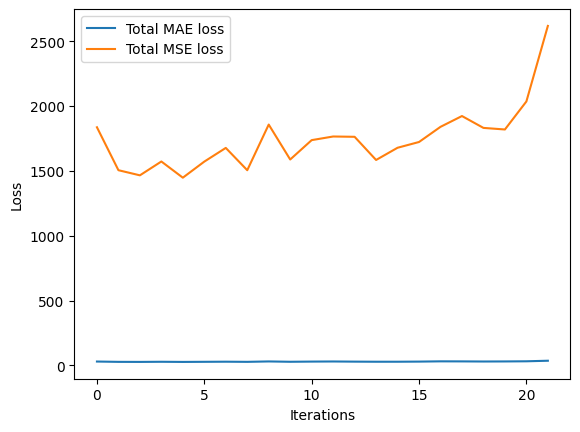

In [ ]:
"""
This code cell is mainly for searching best sequence length for each of step size
in range(step_size,step_size+20)

"""


predict_steps = 1
sequence_length_l = [i for i in range (predict_steps, predict_steps+20)]  # Number of past timestamps to consider

# loss_mse_total=[];loss_mae_total=[];
for sequence_length in sequence_length_l:
  X, y = [], []

  for i in range(len(features_scaled) - sequence_length - predict_steps + 1):
      X.append(features_scaled[i:(i + sequence_length), :])
      y.append(target.values[i + sequence_length:i + sequence_length + predict_steps])

  X, y = np.array(X), np.array(y)

  # Split the data into training and testing sets
  X_train = X
  y_train = y

  X_test, y_test = [], []

  for i in range(len(test_features_scaled) - sequence_length - predict_steps + 1):
      X_test.append(test_features_scaled[i:(i + sequence_length), :])
      y_test.append(test_target.values[i + sequence_length:i + sequence_length + predict_steps])

  X_test, y_test = np.array(X_test), np.array(y_test)

  model = Sequential()
  model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.2))
  model.add(Dense(units=predict_steps))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  # Display the model summary
  # model.summary()

  # Train the model and store the history
  history = model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=1)

  # Print the history, including losses at each epoch
  # print("Training history:")
  # print(history.history)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Display the finalized weights
  # for layer in model.layers:
  #     print(f"Weights for {layer.name}:")
  #     print(layer.get_weights()).
  mse = np.mean(np.square(y_pred - y_test))
  mae = np.mean(abs(y_pred - y_test))
  print(f'Sequence Length {sequence_length}\nMean Squared Error on Test Set: {mse}\nMean Absolurte Error on Test Set: {mae}')
  loss_mae_total.append(mae)
  loss_mse_total.append(mse)

plt.plot(loss_mae_total, label='Total MAE loss')
plt.plot(loss_mse_total, label='Total MSE loss')
plt.xlabel('Sequence Length')
plt.ylabel('Loss')
plt.legend()
plt.show()



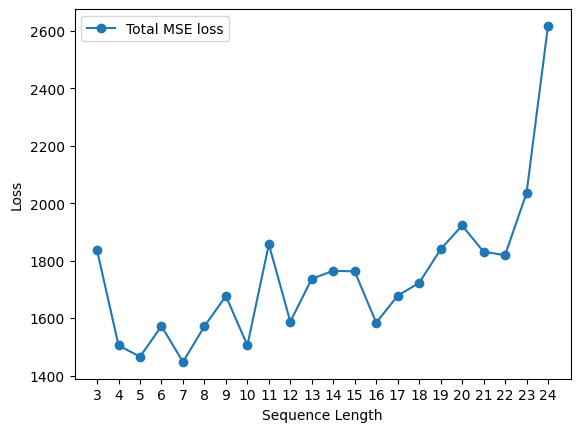

In [ ]:
x_values = [i for i in range(3,3+len(loss_mse_total))]

plt.plot(x_values, loss_mse_total, marker='o', label='Total MSE loss')
plt.xlabel('Sequence Length')
plt.ylabel('Loss')
plt.legend()
plt.xticks(x_values)
plt.show()

# plt.plot(loss_mae_total, label='Total MAE loss')
# plt.plot([i+5 for i in range(len(loss_mse_total))],loss_mse_total, label='Total MSE loss')
# plt.xlabel('Sequence Length')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()



In [ ]:
sequence_length = 7  # Number of past timestamps to consider
predict_steps = 1 # Number of steps to predict ahead

X, y = [], []

for i in range(len(features_scaled) - sequence_length - predict_steps + 1):
    X.append(features_scaled[i:(i + sequence_length), :])
    y.append(target.values[i + sequence_length:i + sequence_length + predict_steps])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train = X
y_train = y


In [ ]:
len(X_train)

7000

In [ ]:
len(y_train)

7000

In [ ]:
X_test, y_test = [], []

for i in range(len(test_features_scaled) - sequence_length - predict_steps + 1):
    X_test.append(test_features_scaled[i:(i + sequence_length), :])
    y_test.append(test_target.values[i + sequence_length:i + sequence_length + predict_steps])

X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
len(X_test)

1722

In [ ]:
len(y_test)

1722

In [ ]:
X_test

array([[[0.        , 0.21621622, 0.60465116, ..., 0.13717113,
         0.02857143, 0.14184397],
        [0.        , 0.35135135, 0.58139535, ..., 0.15167529,
         0.02040816, 0.13120567],
        [0.        , 0.35135135, 0.58139535, ..., 0.19024061,
         0.0122449 , 0.12056738],
        ...,
        [0.        , 0.35135135, 0.58139535, ..., 0.17618619,
         0.02040816, 0.06028369],
        [0.        , 0.35135135, 0.58139535, ..., 0.17135147,
         0.02857143, 0.06737589],
        [0.        , 0.35135135, 0.58139535, ..., 0.20294581,
         0.02040816, 0.03900709]],

       [[0.        , 0.35135135, 0.58139535, ..., 0.15167529,
         0.02040816, 0.13120567],
        [0.        , 0.35135135, 0.58139535, ..., 0.19024061,
         0.0122449 , 0.12056738],
        [0.        , 0.35135135, 0.58139535, ..., 0.17360018,
         0.02040816, 0.06382979],
        ...,
        [0.        , 0.35135135, 0.58139535, ..., 0.17135147,
         0.02857143, 0.06737589],
        [0. 

In [ ]:
y_train

array([[137.],
       [137.],
       [157.],
       ...,
       [ 39.],
       [ 36.],
       [ 28.]])

In [ ]:
# Finding minimum and maximum values for y_test
min_v_test = np.min(y_test)
max_v_test = np.max(y_test)

print(min_v_test, max_v_test)

2.0 297.0


In [ ]:
# Finding minimum and maximum values for y_train
min_v = np.min(y_train)
max_v = np.max(y_train)
scale_down = (y_train - min_v) / (max_v - min_v)
scale_down = np.array(scale_down)
# scale_down

In [ ]:
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=predict_steps))  # Modify units to predict 7 steps ahead
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model and store the history
history = model.fit(X_train, scale_down, epochs=50, batch_size=50, verbose=1)

model.save_weights('T_city_1.h5')

# Print the history, including losses at each epoch
print("Training history:")
print(history.history)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the finalized weights
for layer in model.layers:
    print(f"Weights for {layer.name}:")
    print(layer.get_weights())


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_26 (GRU)                (None, 50)                9450      
                                                                 
 dropout_26 (Dropout)        (None, 50)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 9501 (37.11 KB)
Trainable params: 9501 (37.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
140/140 [==============================] - 1s 3ms/step - loss: 0.0081 - mae: 0.0663
Epoch 2/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0046 - mae: 0.0490
Epoch 3/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0039 - mae: 0.044

In [ ]:
len(y_pred)

1722

In [ ]:
y_pred_scaledup = [min_v+i*(max_v-min_v) for i in y_pred]

In [ ]:
y_pred

array([[0.08923056],
       [0.06771046],
       [0.06184823],
       ...,
       [0.07126872],
       [0.08666752],
       [0.13417064]], dtype=float32)

In [ ]:
len(y_pred_scaledup[0])

1

In [ ]:
y_pred

array([[0.08923056],
       [0.06771046],
       [0.06184823],
       ...,
       [0.07126872],
       [0.08666752],
       [0.13417064]], dtype=float32)

In [ ]:
y_test

array([[46.],
       [33.],
       [32.],
       ...,
       [73.],
       [81.],
       [89.]])

In [ ]:
len(y_test)

1722

In [ ]:
mse = 0
for i in range(len(y_test)):
  mse += np.mean(np.square(y_pred_scaledup[i] - y_test[i]))

mse /= len(y_test)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 1269.5551119082893


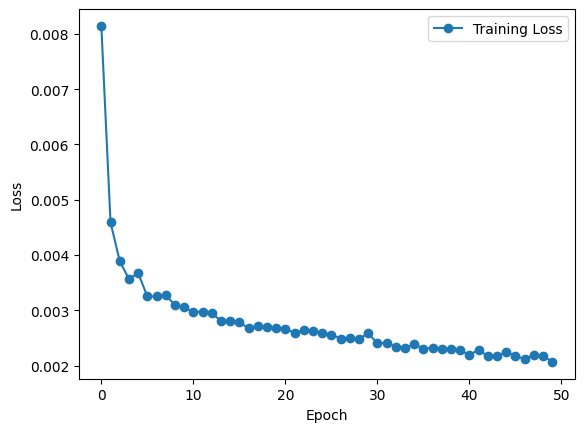

In [ ]:
# Evaluate the model (you may need to adjust this based on your specific evaluation metrics)
# mse = np.mean(np.square(y_pred_scaledup - y_test))
# print(f'Mean Squared Error on Test Set: {mse}')

# Access loss for each epoch
train_loss = history.history['loss']

# Plot the training and validation loss over epochs
plt.plot(train_loss, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
y_test_scaleD=[(i-min_v_test)/(max_v_test-min_v_test) for i in y_test]

In [ ]:
mse = np.mean(np.square(y_pred - y_test_scaleD))
mae = np.mean(abs(y_pred - y_test_scaleD))
print(f'Mean Squared Error on Test Set -> scaled 0 to 1 : {mse}\nMean Absolurte Error on Test Set -> scaled 0 to 1 : {mae}')
# print(f'Mean Squared Error on Test Set : {mse}\nMean Absolurte Error on Test Set : {mae}')

Mean Squared Error on Test Set -> scaled 0 to 1 : 0.03300114916467194
Mean Absolurte Error on Test Set -> scaled 0 to 1 : 0.14102563440935967


In [ ]:
y_test_val=[i[0] for i in y_test]
y_pred_val=[i[0] for i in y_pred_scaledup]

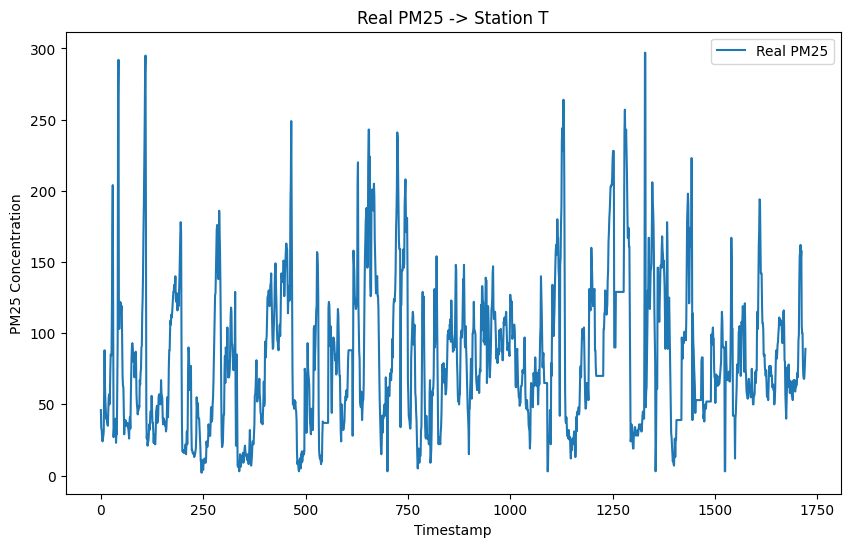

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_val, label='Real PM25')
# plt.plot(y_pred, label='Predicted PM25')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Real PM25 -> Station T')
plt.legend()
plt.show()

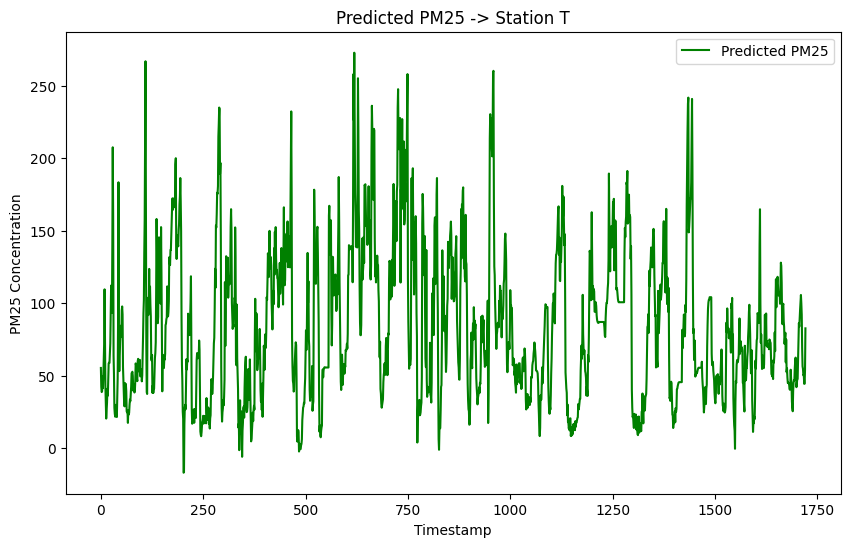

In [ ]:
plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Real PM25')
plt.plot(y_pred_val, label='Predicted PM25',c='g')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Predicted PM25 -> Station T')
plt.legend()
plt.show()

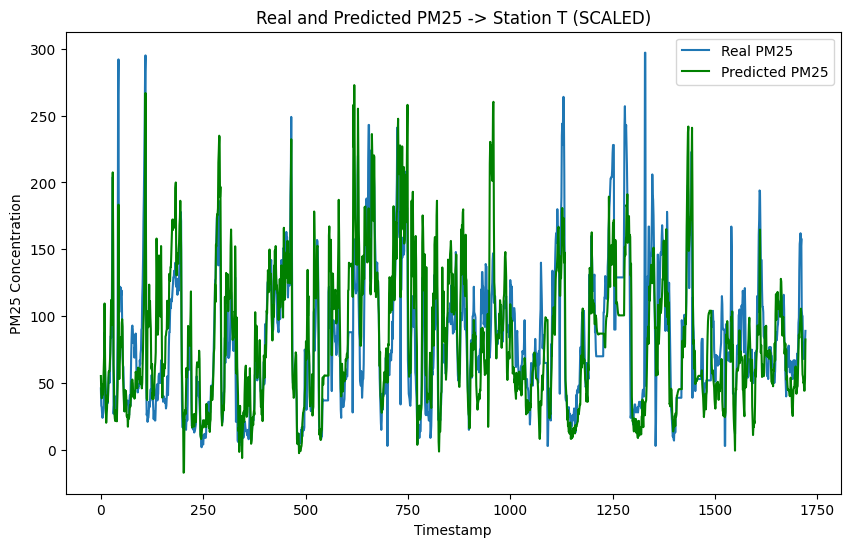

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_val, label='Real PM25')
plt.plot(y_pred_val, label='Predicted PM25', c='g')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Real and Predicted PM25 -> Station T (SCALED)')
plt.legend()
plt.show()


##STEP Size - > 7


Epoch 1/50
140/140 [==============================] - 2s 4ms/step - loss: 8733.7510 - mae: 67.8594
Epoch 2/50
140/140 [==============================] - 1s 4ms/step - loss: 4264.3115 - mae: 48.1099
Epoch 3/50
140/140 [==============================] - 0s 3ms/step - loss: 4010.4221 - mae: 45.9523
Epoch 4/50
140/140 [==============================] - 0s 4ms/step - loss: 3868.3369 - mae: 44.8205
Epoch 5/50
140/140 [==============================] - 1s 4ms/step - loss: 3665.4014 - mae: 43.5043
Epoch 6/50
140/140 [==============================] - 1s 4ms/step - loss: 3583.3079 - mae: 42.8359
Epoch 7/50
140/140 [==============================] - 1s 4ms/step - loss: 3336.2720 - mae: 41.5300
Epoch 8/50
140/140 [==============================] - 1s 4ms/step - loss: 3283.6899 - mae: 41.0591
Epoch 9/50
140/140 [==============================] - 0s 3ms/step - loss: 3067.1782 - mae: 39.8964
Epoch 10/50
140/140 [==============================] - 1s 4ms/step - loss: 3254.6726 - mae: 40.6177
Epoch 11/

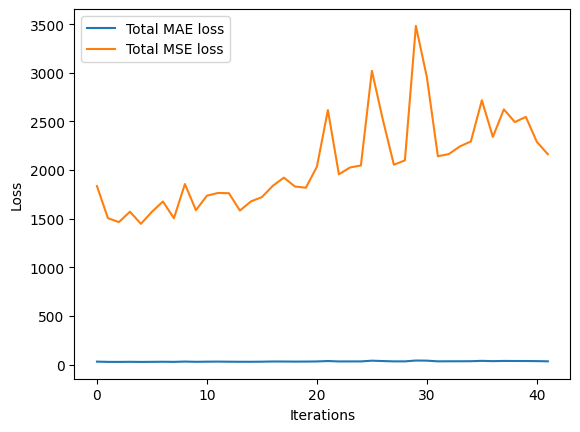

In [ ]:
"""
This code cell is mainly for searching best sequence length for each of step size
in range(step_size,step_size+20)

"""

predict_steps = 7
sequence_length_l = [i for i in range (predict_steps,predict_steps+20)]  # Number of past timestamps to consider

loss_mae_total=[]
loss_mse_total=[]

for sequence_length in sequence_length_l:
  X, y = [], []

  for i in range(len(features_scaled) - sequence_length - predict_steps + 1):
      X.append(features_scaled[i:(i + sequence_length), :])
      y.append(target.values[i + sequence_length:i + sequence_length + predict_steps])

  X, y = np.array(X), np.array(y)

  # Split the data into training and testing sets
  X_train = X
  y_train = y

  X_test, y_test = [], []

  for i in range(len(test_features_scaled) - sequence_length - predict_steps + 1):
      X_test.append(test_features_scaled[i:(i + sequence_length), :])
      y_test.append(test_target.values[i + sequence_length:i + sequence_length + predict_steps])

  X_test, y_test = np.array(X_test), np.array(y_test)

  model = Sequential()
  model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.2))
  model.add(Dense(units=predict_steps))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  # Display the model summary
  # model.summary()

  # Train the model and store the history
  history = model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=1)

  # Print the history, including losses at each epoch
  # print("Training history:")
  # print(history.history)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Display the finalized weights
  # for layer in model.layers:
  #     print(f"Weights for {layer.name}:")
  #     print(layer.get_weights()).
  mse = np.mean(np.square(y_pred - y_test))
  mae = np.mean(abs(y_pred - y_test))
  print(f'Sequence Length {sequence_length}\nMean Squared Error on Test Set: {mse}\nMean Absolurte Error on Test Set: {mae}')
  loss_mae_total.append(mae)
  loss_mse_total.append(mse)

plt.plot(loss_mae_total, label='Total MAE loss')
plt.plot(loss_mse_total, label='Total MSE loss')
plt.xlabel('Sequence Length')
plt.ylabel('Loss')
plt.legend()
plt.show()



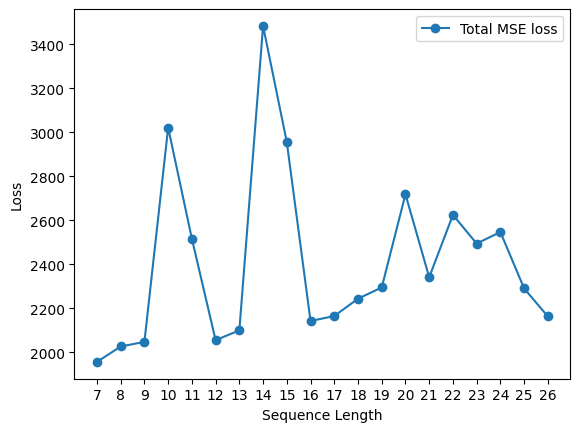

In [ ]:
x_values = [i for i in range(predict_steps,predict_steps+20)]

plt.plot(x_values, loss_mse_total, marker='o', label='Total MSE loss')
plt.xlabel('Sequence Length')
plt.ylabel('Loss')
plt.legend()
plt.xticks(x_values)
plt.show()

# plt.plot(loss_mae_total, label='Total MAE loss')
# plt.plot([i+5 for i in range(len(loss_mse_total))],loss_mse_total, label='Total MSE loss')
# plt.xlabel('Sequence Length')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()



In [ ]:
sequence_length = 7  # Number of past timestamps to consider
predict_steps = 7 # Number of steps to predict ahead

X, y = [], []

for i in range(len(features_scaled) - sequence_length - predict_steps + 1):
    X.append(features_scaled[i:(i + sequence_length), :])
    y.append(target.values[i + sequence_length:i + sequence_length + predict_steps])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train = X
y_train = y


In [ ]:
len(X_train)

6994

In [ ]:
len(y_train)

6994

In [ ]:
X_test, y_test = [], []

for i in range(len(test_features_scaled) - sequence_length - predict_steps + 1):
    X_test.append(test_features_scaled[i:(i + sequence_length), :])
    y_test.append(test_target.values[i + sequence_length:i + sequence_length + predict_steps])

X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
len(X_test)

1716

In [ ]:
len(y_test)

1716

In [ ]:
X_test

array([[[0.        , 0.21621622, 0.60465116, ..., 0.13717113,
         0.02857143, 0.14184397],
        [0.        , 0.35135135, 0.58139535, ..., 0.15167529,
         0.02040816, 0.13120567],
        [0.        , 0.35135135, 0.58139535, ..., 0.19024061,
         0.0122449 , 0.12056738],
        ...,
        [0.        , 0.35135135, 0.58139535, ..., 0.17618619,
         0.02040816, 0.06028369],
        [0.        , 0.35135135, 0.58139535, ..., 0.17135147,
         0.02857143, 0.06737589],
        [0.        , 0.35135135, 0.58139535, ..., 0.20294581,
         0.02040816, 0.03900709]],

       [[0.        , 0.35135135, 0.58139535, ..., 0.15167529,
         0.02040816, 0.13120567],
        [0.        , 0.35135135, 0.58139535, ..., 0.19024061,
         0.0122449 , 0.12056738],
        [0.        , 0.35135135, 0.58139535, ..., 0.17360018,
         0.02040816, 0.06382979],
        ...,
        [0.        , 0.35135135, 0.58139535, ..., 0.17135147,
         0.02857143, 0.06737589],
        [0. 

In [ ]:
y_train

array([[137., 137., 157., ..., 108.,  86.,  70.],
       [137., 157., 124., ...,  86.,  70.,  62.],
       [157., 124., 108., ...,  70.,  62.,  65.],
       ...,
       [156., 124.,  76., ...,  43.,  35.,  39.],
       [124.,  76.,  59., ...,  35.,  39.,  36.],
       [ 76.,  59.,  43., ...,  39.,  36.,  28.]])

In [ ]:
# Finding minimum and maximum values for y_test
min_v_test = np.min(y_test)
max_v_test = np.max(y_test)

print(min_v_test, max_v_test)

2.0 297.0


In [ ]:
# Finding minimum and maximum values for y_train
min_v = np.min(y_train)
max_v = np.max(y_train)
scale_down = (y_train - min_v) / (max_v - min_v)
scale_down = np.array(scale_down)
# scale_down

In [ ]:
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=predict_steps))  # Modify units to predict 7 steps ahead
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model and store the history
history = model.fit(X_train, scale_down, epochs=50, batch_size=50, verbose=1)

# Print the history, including losses at each epoch
print("Training history:")
print(history.history)

model.save_weights('T_city_7.h5')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the finalized weights
for layer in model.layers:
    print(f"Weights for {layer.name}:")
    print(layer.get_weights())


Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_49 (GRU)                (None, 50)                9450      
                                                                 
 dropout_49 (Dropout)        (None, 50)                0         
                                                                 
 dense_49 (Dense)            (None, 7)                 357       
                                                                 
Total params: 9807 (38.31 KB)
Trainable params: 9807 (38.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
140/140 [==============================] - 2s 4ms/step - loss: 0.0144 - mae: 0.0875
Epoch 2/50
140/140 [==============================] - 1s 4ms/step - loss: 0.0082 - mae: 0.0653
Epoch 3/50
140/140 [==============================] - 1s 4ms/step - loss: 0.0073 - mae: 0.061

In [ ]:
len(y_pred)

1716

In [ ]:
y_pred_scaledup = [min_v+i*(max_v-min_v) for i in y_pred]

In [ ]:
y_pred

array([[0.07027315, 0.07165197, 0.0735321 , ..., 0.08024227, 0.08541594,
        0.0907776 ],
       [0.06238227, 0.06572327, 0.06956147, ..., 0.07900864, 0.08507279,
        0.09098057],
       [0.05952771, 0.06237097, 0.06590998, ..., 0.07545393, 0.08173548,
        0.08797973],
       ...,
       [0.07831756, 0.07441898, 0.07110113, ..., 0.06857985, 0.06997787,
        0.07288581],
       [0.08295234, 0.07912295, 0.07659927, ..., 0.07750622, 0.08069839,
        0.08451073],
       [0.09136322, 0.08763932, 0.08568933, ..., 0.08891342, 0.09345154,
        0.0980802 ]], dtype=float32)

In [ ]:
len(y_pred_scaledup[0])

7

In [ ]:
y_pred

array([[0.07027315, 0.07165197, 0.0735321 , ..., 0.08024227, 0.08541594,
        0.0907776 ],
       [0.06238227, 0.06572327, 0.06956147, ..., 0.07900864, 0.08507279,
        0.09098057],
       [0.05952771, 0.06237097, 0.06590998, ..., 0.07545393, 0.08173548,
        0.08797973],
       ...,
       [0.07831756, 0.07441898, 0.07110113, ..., 0.06857985, 0.06997787,
        0.07288581],
       [0.08295234, 0.07912295, 0.07659927, ..., 0.07750622, 0.08069839,
        0.08451073],
       [0.09136322, 0.08763932, 0.08568933, ..., 0.08891342, 0.09345154,
        0.0980802 ]], dtype=float32)

In [ ]:
y_test

array([[ 46.,  33.,  32., ...,  24.,  26.,  28.],
       [ 33.,  32.,  27., ...,  26.,  28.,  31.],
       [ 32.,  27.,  24., ...,  28.,  31.,  59.],
       ...,
       [100., 100.,  77., ...,  68.,  68.,  73.],
       [100.,  77.,  70., ...,  68.,  73.,  81.],
       [ 77.,  70.,  68., ...,  73.,  81.,  89.]])

In [ ]:
len(y_test)

1716

In [ ]:
mse = 0
for i in range(len(y_test)):
  mse += np.mean(np.square(y_pred_scaledup[i] - y_test[i]))

mse /= len(y_test)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 2080.6327700346296


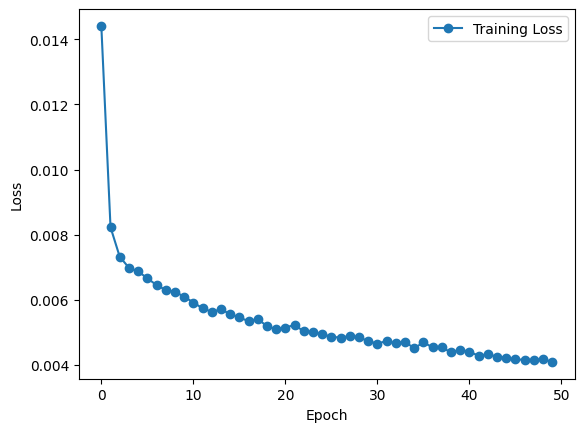

In [ ]:
# Evaluate the model (you may need to adjust this based on your specific evaluation metrics)
# mse = np.mean(np.square(y_pred_scaledup - y_test))
# print(f'Mean Squared Error on Test Set: {mse}')

# Access loss for each epoch
train_loss = history.history['loss']

# Plot the training and validation loss over epochs
plt.plot(train_loss, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
y_test_scaleD=[(i-min_v_test)/(max_v_test-min_v_test) for i in y_test]

In [ ]:
mse = np.mean(np.square(y_pred - y_test_scaleD))
mae = np.mean(abs(y_pred - y_test_scaleD))
print(f'Mean Squared Error on Test Set -> scaled 0 to 1 : {mse}\nMean Absolurte Error on Test Set -> scaled 0 to 1 : {mae}')
# print(f'Mean Squared Error on Test Set : {mse}\nMean Absolurte Error on Test Set : {mae}')

Mean Squared Error on Test Set -> scaled 0 to 1 : 0.033329936635586775
Mean Absolurte Error on Test Set -> scaled 0 to 1 : 0.13594222095769887


In [ ]:
y_test_val=[i[0] for i in y_test]
y_pred_val=[i[0] for i in y_pred_scaledup]

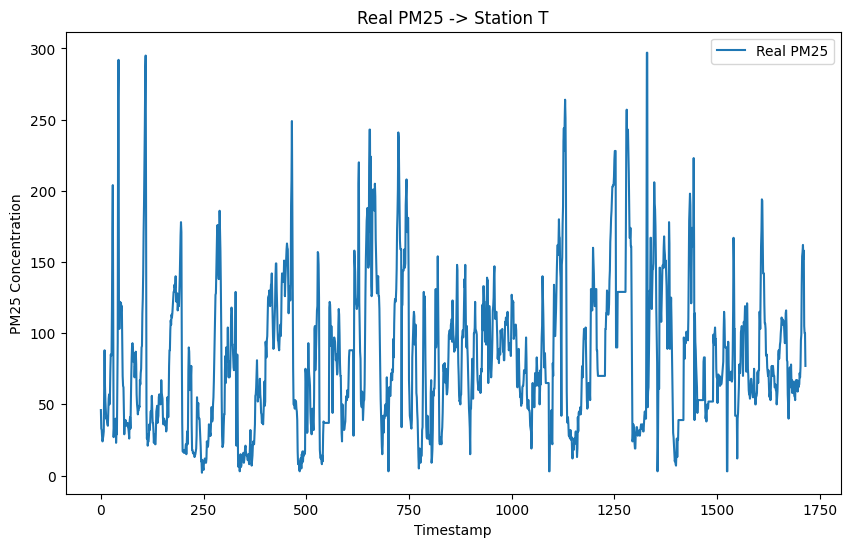

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_val, label='Real PM25')
# plt.plot(y_pred, label='Predicted PM25')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Real PM25 -> Station T')
plt.legend()
plt.show()

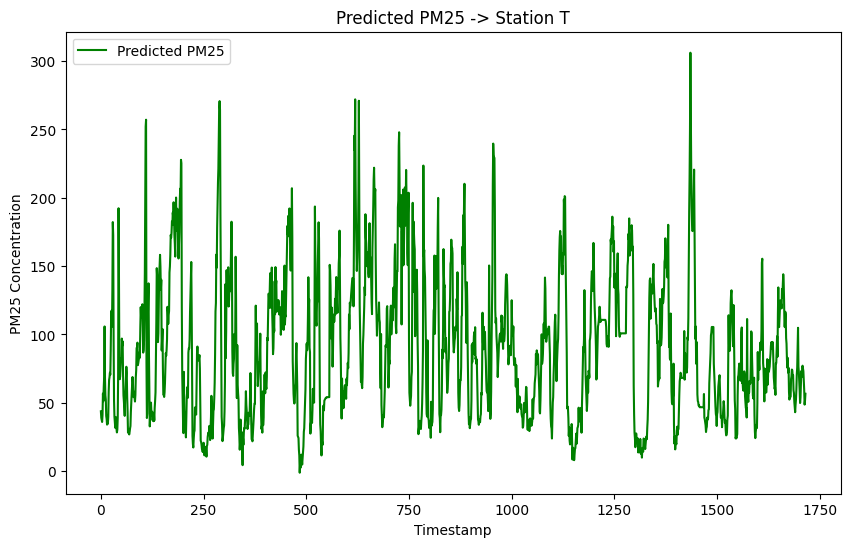

In [ ]:
plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Real PM25')
plt.plot(y_pred_val, label='Predicted PM25',c='g')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Predicted PM25 -> Station T')
plt.legend()
plt.show()

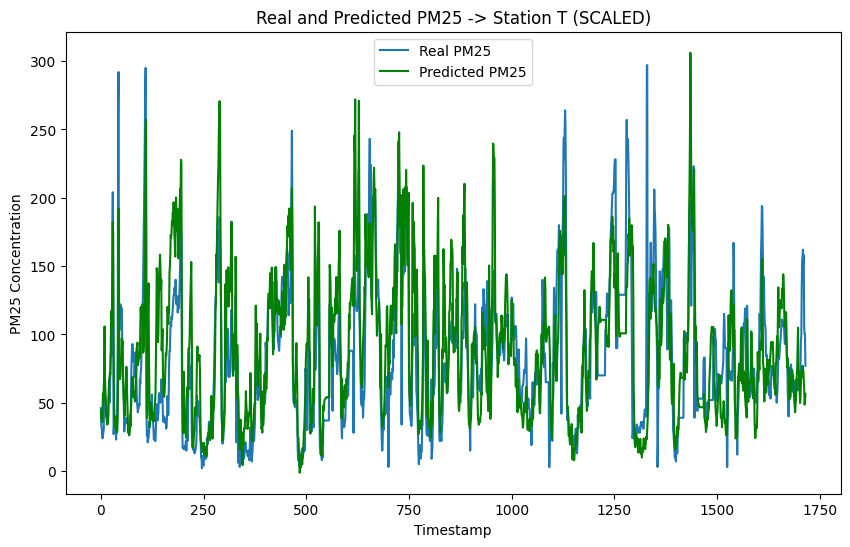

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_val, label='Real PM25')
plt.plot(y_pred_val, label='Predicted PM25', c='g')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Real and Predicted PM25 -> Station T (SCALED)')
plt.legend()
plt.show()


##STEP Size - > 14


Epoch 1/50
140/140 [==============================] - 2s 6ms/step - loss: 8819.6807 - mae: 68.1063
Epoch 2/50
140/140 [==============================] - 1s 8ms/step - loss: 5267.1953 - mae: 53.5589
Epoch 3/50
140/140 [==============================] - 1s 8ms/step - loss: 5085.3203 - mae: 52.4486
Epoch 4/50
140/140 [==============================] - 1s 8ms/step - loss: 4931.2437 - mae: 51.6273
Epoch 5/50
140/140 [==============================] - 1s 6ms/step - loss: 4888.9692 - mae: 51.2580
Epoch 6/50
140/140 [==============================] - 1s 6ms/step - loss: 4677.3652 - mae: 49.9443
Epoch 7/50
140/140 [==============================] - 1s 6ms/step - loss: 4498.4976 - mae: 49.2640
Epoch 8/50
140/140 [==============================] - 1s 5ms/step - loss: 4539.7041 - mae: 49.3184
Epoch 9/50
140/140 [==============================] - 1s 6ms/step - loss: 4286.0142 - mae: 48.0521
Epoch 10/50
140/140 [==============================] - 1s 6ms/step - loss: 4247.7876 - mae: 47.4985
Epoch 11/

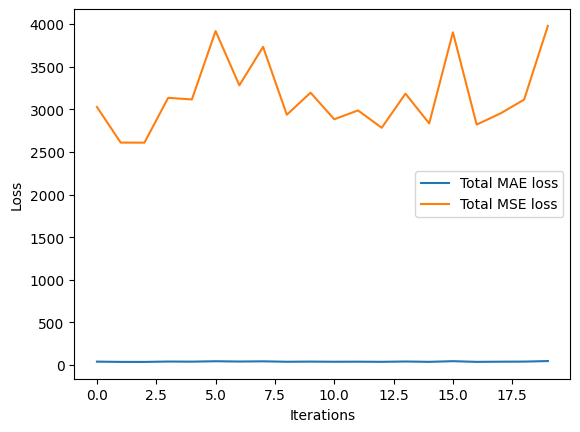

In [ ]:
"""
This code cell is mainly for searching best sequence length for each of step size
in range(step_size,step_size+20)

"""

predict_steps = 14
sequence_length_l = [i for i in range (predict_steps,predict_steps+20)]  # Number of past timestamps to consider

loss_mae_total=[]
loss_mse_total=[]

for sequence_length in sequence_length_l:
  X, y = [], []

  for i in range(len(features_scaled) - sequence_length - predict_steps + 1):
      X.append(features_scaled[i:(i + sequence_length), :])
      y.append(target.values[i + sequence_length:i + sequence_length + predict_steps])

  X, y = np.array(X), np.array(y)

  # Split the data into training and testing sets
  X_train = X
  y_train = y

  X_test, y_test = [], []

  for i in range(len(test_features_scaled) - sequence_length - predict_steps + 1):
      X_test.append(test_features_scaled[i:(i + sequence_length), :])
      y_test.append(test_target.values[i + sequence_length:i + sequence_length + predict_steps])

  X_test, y_test = np.array(X_test), np.array(y_test)

  model = Sequential()
  model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.2))
  model.add(Dense(units=predict_steps))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  # Display the model summary
  # model.summary()

  # Train the model and store the history
  history = model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=1)

  # Print the history, including losses at each epoch
  # print("Training history:")
  # print(history.history)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Display the finalized weights
  # for layer in model.layers:
  #     print(f"Weights for {layer.name}:")
  #     print(layer.get_weights()).
  mse = np.mean(np.square(y_pred - y_test))
  mae = np.mean(abs(y_pred - y_test))
  print(f'Sequence Length {sequence_length}\nMean Squared Error on Test Set: {mse}\nMean Absolurte Error on Test Set: {mae}')
  loss_mae_total.append(mae)
  loss_mse_total.append(mse)

plt.plot(loss_mae_total, label='Total MAE loss')
plt.plot(loss_mse_total, label='Total MSE loss')
plt.xlabel('Sequence Length')
plt.ylabel('Loss')
plt.legend()
plt.show()



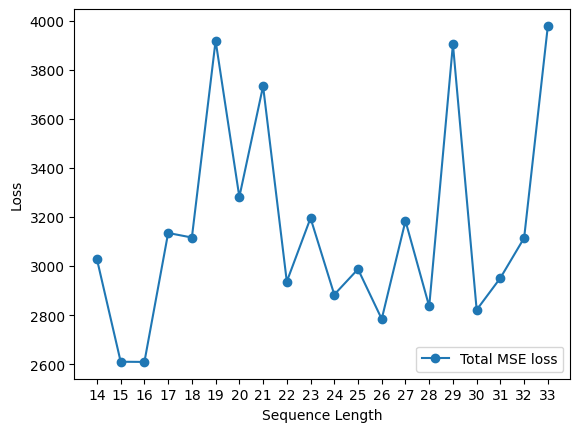

In [ ]:
x_values = [i for i in range(predict_steps,predict_steps+20)]

plt.plot(x_values, loss_mse_total, marker='o', label='Total MSE loss')
plt.xlabel('Sequence Length')
plt.ylabel('Loss')
plt.legend()
plt.xticks(x_values)
plt.show()

# plt.plot(loss_mae_total, label='Total MAE loss')
# plt.plot([i+5 for i in range(len(loss_mse_total))],loss_mse_total, label='Total MSE loss')
# plt.xlabel('Sequence Length')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()



In [ ]:
sequence_length = predict_steps+ loss_mse_total.index(min(loss_mse_total))  # Number of past timestamps to consider

X, y = [], []

for i in range(len(features_scaled) - sequence_length - predict_steps + 1):
    X.append(features_scaled[i:(i + sequence_length), :])
    y.append(target.values[i + sequence_length:i + sequence_length + predict_steps])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train = X
y_train = y


In [ ]:
len(X_train)

6978

In [ ]:
len(y_train)

6978

In [ ]:
X_test, y_test = [], []

for i in range(len(test_features_scaled) - sequence_length - predict_steps + 1):
    X_test.append(test_features_scaled[i:(i + sequence_length), :])
    y_test.append(test_target.values[i + sequence_length:i + sequence_length + predict_steps])

X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
len(X_test)

1700

In [ ]:
len(y_test)

1700

In [ ]:
X_test

array([[[0.        , 0.21621622, 0.60465116, ..., 0.13717113,
         0.02857143, 0.14184397],
        [0.        , 0.35135135, 0.58139535, ..., 0.15167529,
         0.02040816, 0.13120567],
        [0.        , 0.35135135, 0.58139535, ..., 0.19024061,
         0.0122449 , 0.12056738],
        ...,
        [0.        , 0.37837838, 0.69767442, ..., 0.19698673,
         0.04897959, 0.23049645],
        [0.        , 0.40540541, 0.69767442, ..., 0.23487745,
         0.05306122, 0.19503546],
        [0.        , 0.37837838, 0.69767442, ..., 0.28873398,
         0.04897959, 0.18794326]],

       [[0.        , 0.35135135, 0.58139535, ..., 0.15167529,
         0.02040816, 0.13120567],
        [0.        , 0.35135135, 0.58139535, ..., 0.19024061,
         0.0122449 , 0.12056738],
        [0.        , 0.35135135, 0.58139535, ..., 0.17360018,
         0.02040816, 0.06382979],
        ...,
        [0.        , 0.40540541, 0.69767442, ..., 0.23487745,
         0.05306122, 0.19503546],
        [0. 

In [ ]:
y_train

array([[ 64.,  53.,  61., ...,  32.,  28.,  29.],
       [ 53.,  61.,  62., ...,  28.,  29.,  28.],
       [ 61.,  62.,  79., ...,  29.,  28.,  35.],
       ...,
       [143., 102.,  81., ...,  43.,  35.,  39.],
       [102.,  81., 124., ...,  35.,  39.,  36.],
       [ 81., 124., 138., ...,  39.,  36.,  28.]])

In [ ]:
# Finding minimum and maximum values for y_test
min_v_test = np.min(y_test)
max_v_test = np.max(y_test)

print(min_v_test, max_v_test)

2.0 297.0


In [ ]:
# Finding minimum and maximum values for y_train
min_v = np.min(y_train)
max_v = np.max(y_train)
scale_down = (y_train - min_v) / (max_v - min_v)
scale_down = np.array(scale_down)
# scale_down

In [ ]:
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=predict_steps))  # Modify units to predict 7 steps ahead
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model and store the history
history = model.fit(X_train, scale_down, epochs=50, batch_size=50, verbose=1)

# Print the history, including losses at each epoch
print("Training history:")
print(history.history)

model.save_weights('T_city_14.h5')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the finalized weights
for layer in model.layers:
    print(f"Weights for {layer.name}:")
    print(layer.get_weights())


Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_70 (GRU)                (None, 50)                9450      
                                                                 
 dropout_70 (Dropout)        (None, 50)                0         
                                                                 
 dense_70 (Dense)            (None, 14)                714       
                                                                 
Total params: 10164 (39.70 KB)
Trainable params: 10164 (39.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
140/140 [==============================] - 2s 6ms/step - loss: 0.0158 - mae: 0.0919
Epoch 2/50
140/140 [==============================] - 1s 7ms/step - loss: 0.0108 - mae: 0.0751
Epoch 3/50
140/140 [==============================] - 1s 8ms/step - loss: 0.0098 - mae: 0.0

In [ ]:
len(y_pred)

1700

In [ ]:
y_pred_scaledup = [min_v+i*(max_v-min_v) for i in y_pred]

In [ ]:
y_pred

array([[0.15703386, 0.14875005, 0.14040713, ..., 0.17894793, 0.18349439,
        0.18579692],
       [0.13316353, 0.12372097, 0.11539243, ..., 0.1516266 , 0.15569839,
        0.1590106 ],
       [0.10750578, 0.10021235, 0.09415845, ..., 0.12362778, 0.12634447,
        0.12998644],
       ...,
       [0.13846964, 0.13359764, 0.12555744, ..., 0.06960344, 0.06981727,
        0.07303938],
       [0.14512335, 0.13823704, 0.1280721 , ..., 0.06585198, 0.06677775,
        0.07060988],
       [0.13410088, 0.12660414, 0.11635791, ..., 0.06332995, 0.06566943,
        0.07078436]], dtype=float32)

In [ ]:
len(y_pred_scaledup[0])

14

In [ ]:
y_pred

array([[0.15703386, 0.14875005, 0.14040713, ..., 0.17894793, 0.18349439,
        0.18579692],
       [0.13316353, 0.12372097, 0.11539243, ..., 0.1516266 , 0.15569839,
        0.1590106 ],
       [0.10750578, 0.10021235, 0.09415845, ..., 0.12362778, 0.12634447,
        0.12998644],
       ...,
       [0.13846964, 0.13359764, 0.12555744, ..., 0.06960344, 0.06981727,
        0.07303938],
       [0.14512335, 0.13823704, 0.1280721 , ..., 0.06585198, 0.06677775,
        0.07060988],
       [0.13410088, 0.12660414, 0.11635791, ..., 0.06332995, 0.06566943,
        0.07078436]], dtype=float32)

In [ ]:
y_test

array([[ 88.,  63.,  52., ...,  57.,  50.,  55.],
       [ 63.,  52.,  46., ...,  50.,  55.,  73.],
       [ 52.,  46.,  40., ...,  55.,  73.,  85.],
       ...,
       [134., 154., 157., ...,  68.,  68.,  73.],
       [154., 157., 162., ...,  68.,  73.,  81.],
       [157., 162., 152., ...,  73.,  81.,  89.]])

In [ ]:
len(y_test)

1700

In [ ]:
mse = 0
for i in range(len(y_test)):
  mse += np.mean(np.square(y_pred_scaledup[i] - y_test[i]))

mse /= len(y_test)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 3717.4801735754404


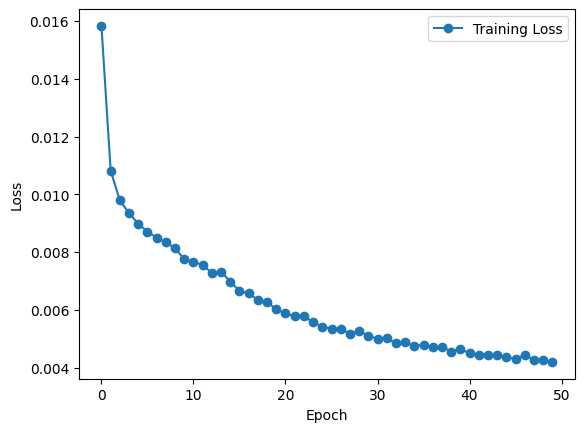

In [ ]:
# Evaluate the model (you may need to adjust this based on your specific evaluation metrics)
# mse = np.mean(np.square(y_pred_scaledup - y_test))
# print(f'Mean Squared Error on Test Set: {mse}')

# Access loss for each epoch
train_loss = history.history['loss']

# Plot the training and validation loss over epochs
plt.plot(train_loss, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
y_test_scaleD=[(i-min_v_test)/(max_v_test-min_v_test) for i in y_test]

In [ ]:
mse = np.mean(np.square(y_pred - y_test_scaleD))
mae = np.mean(abs(y_pred - y_test_scaleD))
print(f'Mean Squared Error on Test Set -> scaled 0 to 1 : {mse}\nMean Absolurte Error on Test Set -> scaled 0 to 1 : {mae}')
# print(f'Mean Squared Error on Test Set : {mse}\nMean Absolurte Error on Test Set : {mae}')

Mean Squared Error on Test Set -> scaled 0 to 1 : 0.04167729370372508
Mean Absolurte Error on Test Set -> scaled 0 to 1 : 0.15257953697078863


In [ ]:
y_test_val=[i[0] for i in y_test]
y_pred_val=[i[0] for i in y_pred_scaledup]

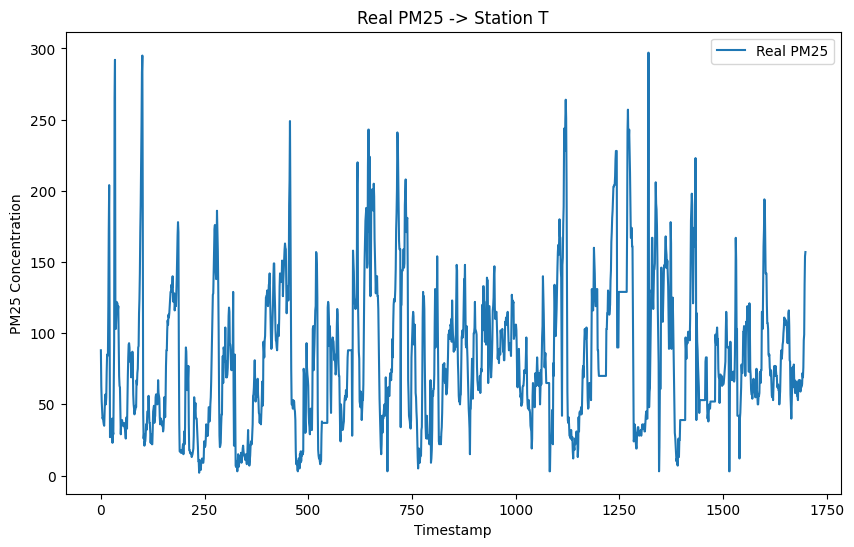

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_val, label='Real PM25')
# plt.plot(y_pred, label='Predicted PM25')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Real PM25 -> Station T')
plt.legend()
plt.show()

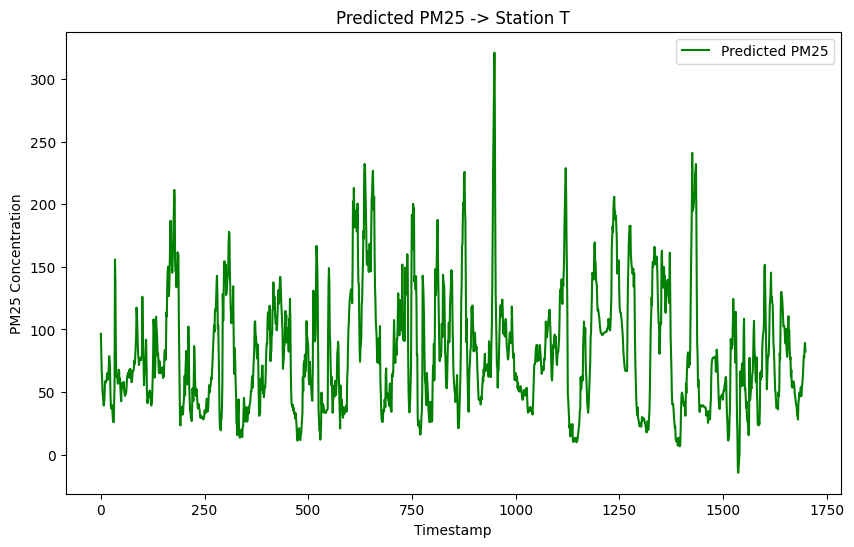

In [ ]:
plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Real PM25')
plt.plot(y_pred_val, label='Predicted PM25',c='g')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Predicted PM25 -> Station T')
plt.legend()
plt.show()

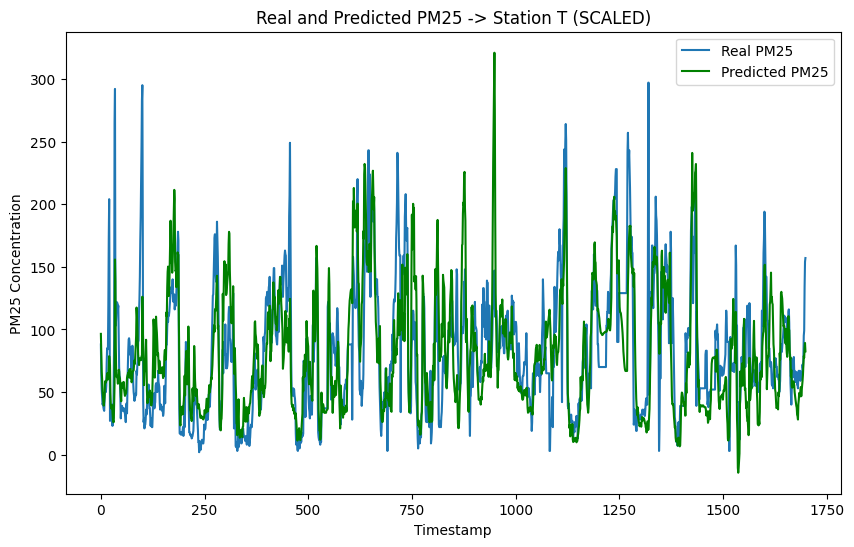

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_val, label='Real PM25')
plt.plot(y_pred_val, label='Predicted PM25', c='g')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Real and Predicted PM25 -> Station T (SCALED)')
plt.legend()
plt.show()


##STEP Size - > 30


Epoch 1/50
139/139 [==============================] - 2s 10ms/step - loss: 8963.9658 - mae: 68.8041
Epoch 2/50
139/139 [==============================] - 1s 10ms/step - loss: 5716.9780 - mae: 55.3587
Epoch 3/50
139/139 [==============================] - 1s 10ms/step - loss: 5547.9507 - mae: 54.4181
Epoch 4/50
139/139 [==============================] - 1s 10ms/step - loss: 5381.8350 - mae: 53.6004
Epoch 5/50
139/139 [==============================] - 2s 13ms/step - loss: 5213.1348 - mae: 52.7337
Epoch 6/50
139/139 [==============================] - 2s 14ms/step - loss: 5044.4009 - mae: 51.8611
Epoch 7/50
139/139 [==============================] - 1s 10ms/step - loss: 5008.7505 - mae: 51.6221
Epoch 8/50
139/139 [==============================] - 1s 9ms/step - loss: 4916.8926 - mae: 51.1693
Epoch 9/50
139/139 [==============================] - 1s 9ms/step - loss: 4977.6411 - mae: 51.2614
Epoch 10/50
139/139 [==============================] - 1s 10ms/step - loss: 4839.6548 - mae: 50.6566
E

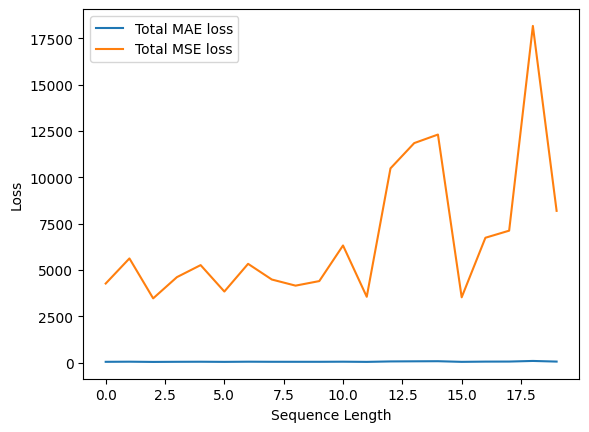

In [ ]:
"""
This code cell is mainly for searching best sequence length for each of step size
in range(step_size,step_size+20)

"""

predict_steps = 30
sequence_length_l = [i for i in range (predict_steps,predict_steps+20)]  # Number of past timestamps to consider

loss_mae_total=[]
loss_mse_total=[]

for sequence_length in sequence_length_l:
  X, y = [], []

  for i in range(len(features_scaled) - sequence_length - predict_steps + 1):
      X.append(features_scaled[i:(i + sequence_length), :])
      y.append(target.values[i + sequence_length:i + sequence_length + predict_steps])

  X, y = np.array(X), np.array(y)

  # Split the data into training and testing sets
  X_train = X
  y_train = y

  X_test, y_test = [], []

  for i in range(len(test_features_scaled) - sequence_length - predict_steps + 1):
      X_test.append(test_features_scaled[i:(i + sequence_length), :])
      y_test.append(test_target.values[i + sequence_length:i + sequence_length + predict_steps])

  X_test, y_test = np.array(X_test), np.array(y_test)

  model = Sequential()
  model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.2))
  model.add(Dense(units=predict_steps))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  # Display the model summary
  # model.summary()

  # Train the model and store the history
  history = model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=1)

  # Print the history, including losses at each epoch
  # print("Training history:")
  # print(history.history)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Display the finalized weights
  # for layer in model.layers:
  #     print(f"Weights for {layer.name}:")
  #     print(layer.get_weights()).
  mse = np.mean(np.square(y_pred - y_test))
  mae = np.mean(abs(y_pred - y_test))
  print(f'Sequence Length {sequence_length}\nMean Squared Error on Test Set: {mse}\nMean Absolurte Error on Test Set: {mae}')
  loss_mae_total.append(mae)
  loss_mse_total.append(mse)

plt.plot(loss_mae_total, label='Total MAE loss')
plt.plot(loss_mse_total, label='Total MSE loss')
plt.xlabel('Sequence Length')
plt.ylabel('Loss')
plt.legend()
plt.show()



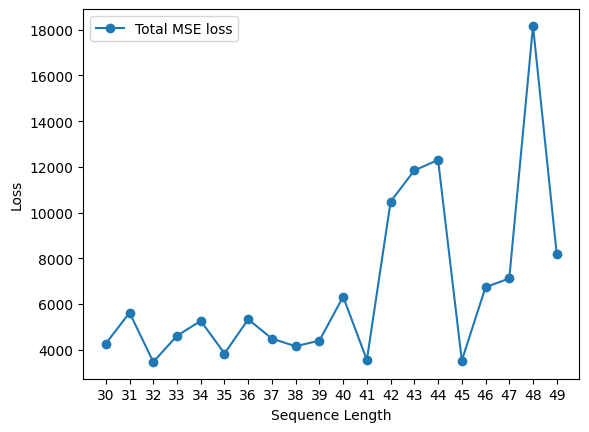

In [ ]:
x_values = [i for i in range(predict_steps,predict_steps+20)]

plt.plot(x_values, loss_mse_total, marker='o', label='Total MSE loss')
plt.xlabel('Sequence Length')
plt.ylabel('Loss')
plt.legend()
plt.xticks(x_values)
plt.show()

# plt.plot(loss_mae_total, label='Total MAE loss')
# plt.plot([i+5 for i in range(len(loss_mse_total))],loss_mse_total, label='Total MSE loss')
# plt.xlabel('Sequence Length')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()



In [ ]:
sequence_length = predict_steps+ loss_mse_total.index(min(loss_mse_total))  # Number of past timestamps to consider

X, y = [], []

for i in range(len(features_scaled) - sequence_length - predict_steps + 1):
    X.append(features_scaled[i:(i + sequence_length), :])
    y.append(target.values[i + sequence_length:i + sequence_length + predict_steps])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train = X
y_train = y


In [ ]:
len(X_train)

6946

In [ ]:
len(y_train)

6946

In [ ]:
X_test, y_test = [], []

for i in range(len(test_features_scaled) - sequence_length - predict_steps + 1):
    X_test.append(test_features_scaled[i:(i + sequence_length), :])
    y_test.append(test_target.values[i + sequence_length:i + sequence_length + predict_steps])

X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
len(X_test)

1668

In [ ]:
len(y_test)

1668

In [ ]:
X_test

array([[[0.        , 0.21621622, 0.60465116, ..., 0.13717113,
         0.02857143, 0.14184397],
        [0.        , 0.35135135, 0.58139535, ..., 0.15167529,
         0.02040816, 0.13120567],
        [0.        , 0.35135135, 0.58139535, ..., 0.19024061,
         0.0122449 , 0.12056738],
        ...,
        [0.        , 0.13513514, 0.8372093 , ..., 0.2248707 ,
         0.03265306, 0.0177305 ],
        [0.        , 0.13513514, 0.8372093 , ..., 0.24465932,
         0.0244898 , 0.0141844 ],
        [0.        , 0.13513514, 0.8372093 , ..., 0.25241736,
         0.01632653, 0.0141844 ]],

       [[0.        , 0.35135135, 0.58139535, ..., 0.15167529,
         0.02040816, 0.13120567],
        [0.        , 0.35135135, 0.58139535, ..., 0.19024061,
         0.0122449 , 0.12056738],
        [0.        , 0.35135135, 0.58139535, ..., 0.17360018,
         0.02040816, 0.06382979],
        ...,
        [0.        , 0.13513514, 0.8372093 , ..., 0.24465932,
         0.0244898 , 0.0141844 ],
        [0. 

In [ ]:
y_train

array([[ 25.,  17.,  15., ...,  51.,  58.,  57.],
       [ 17.,  15.,  18., ...,  58.,  57.,  49.],
       [ 15.,  18.,  18., ...,  57.,  49.,  44.],
       ...,
       [ 21.,  91., 103., ...,  43.,  35.,  39.],
       [ 91., 103., 112., ...,  35.,  39.,  36.],
       [103., 112., 124., ...,  39.,  36.,  28.]])

In [ ]:
# Finding minimum and maximum values for y_test
min_v_test = np.min(y_test)
max_v_test = np.max(y_test)

print(min_v_test, max_v_test)

2.0 297.0


In [ ]:
# Finding minimum and maximum values for y_train
min_v = np.min(y_train)
max_v = np.max(y_train)
scale_down = (y_train - min_v) / (max_v - min_v)
scale_down = np.array(scale_down)
# scale_down

In [ ]:
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=predict_steps))  # Modify units to predict 7 steps ahead
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model and store the history
history = model.fit(X_train, scale_down, epochs=50, batch_size=50, verbose=1)

# Print the history, including losses at each epoch
print("Training history:")
print(history.history)

model.save_weights('T_city_30.h5')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the finalized weights
for layer in model.layers:
    print(f"Weights for {layer.name}:")
    print(layer.get_weights())


Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_91 (GRU)                (None, 50)                9450      
                                                                 
 dropout_91 (Dropout)        (None, 50)                0         
                                                                 
 dense_91 (Dense)            (None, 30)                1530      
                                                                 
Total params: 10980 (42.89 KB)
Trainable params: 10980 (42.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
139/139 [==============================] - 3s 12ms/step - loss: 0.0194 - mae: 0.1009
Epoch 2/50
139/139 [==============================] - 2s 12ms/step - loss: 0.0132 - mae: 0.0834
Epoch 3/50
139/139 [==============================] - 2s 12ms/step - loss: 0.0123 - mae: 

In [ ]:
len(y_pred)

1668

In [ ]:
y_pred_scaledup = [min_v+i*(max_v-min_v) for i in y_pred]

In [ ]:
y_pred

array([[0.13666391, 0.14372723, 0.139407  , ..., 0.28788397, 0.28761247,
        0.286475  ],
       [0.12767431, 0.13289848, 0.12819336, ..., 0.28089714, 0.2800503 ,
        0.2788224 ],
       [0.11219782, 0.11166313, 0.10431603, ..., 0.24755192, 0.24502665,
        0.24256937],
       ...,
       [0.07918639, 0.07462388, 0.07079357, ..., 0.06085658, 0.06254477,
        0.06359826],
       [0.09299313, 0.08923915, 0.08486056, ..., 0.07287961, 0.07504839,
        0.07631578],
       [0.0915612 , 0.0900399 , 0.08760791, ..., 0.08267404, 0.08476496,
        0.08613916]], dtype=float32)

In [ ]:
len(y_pred_scaledup[0])

30

In [ ]:
y_pred

array([[0.13666391, 0.14372723, 0.139407  , ..., 0.28788397, 0.28761247,
        0.286475  ],
       [0.12767431, 0.13289848, 0.12819336, ..., 0.28089714, 0.2800503 ,
        0.2788224 ],
       [0.11219782, 0.11166313, 0.10431603, ..., 0.24755192, 0.24502665,
        0.24256937],
       ...,
       [0.07918639, 0.07462388, 0.07079357, ..., 0.06085658, 0.06254477,
        0.06359826],
       [0.09299313, 0.08923915, 0.08486056, ..., 0.07287961, 0.07504839,
        0.07631578],
       [0.0915612 , 0.0900399 , 0.08760791, ..., 0.08267404, 0.08476496,
        0.08613916]], dtype=float32)

In [ ]:
y_test

array([[ 84.,  85., 119., ...,  94.,  70.,  63.],
       [ 85., 119., 172., ...,  70.,  63.,  62.],
       [119., 172., 204., ...,  63.,  62.,  44.],
       ...,
       [ 53.,  66.,  67., ...,  68.,  68.,  73.],
       [ 66.,  67.,  66., ...,  68.,  73.,  81.],
       [ 67.,  66.,  66., ...,  73.,  81.,  89.]])

In [ ]:
len(y_test)

1668

In [ ]:
mse = 0
for i in range(len(y_test)):
  mse += np.mean(np.square(y_pred_scaledup[i] - y_test[i]))

mse /= len(y_test)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 4498.068485828846


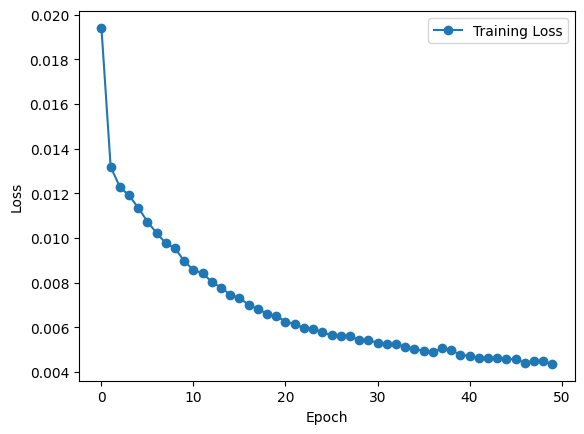

In [ ]:
# Evaluate the model (you may need to adjust this based on your specific evaluation metrics)
# mse = np.mean(np.square(y_pred_scaledup - y_test))
# print(f'Mean Squared Error on Test Set: {mse}')

# Access loss for each epoch
train_loss = history.history['loss']

# Plot the training and validation loss over epochs
plt.plot(train_loss, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
y_test_scaleD=[(i-min_v_test)/(max_v_test-min_v_test) for i in y_test]

In [ ]:
mse = np.mean(np.square(y_pred - y_test_scaleD))
mae = np.mean(abs(y_pred - y_test_scaleD))
print(f'Mean Squared Error on Test Set -> scaled 0 to 1 : {mse}\nMean Absolurte Error on Test Set -> scaled 0 to 1 : {mae}')
# print(f'Mean Squared Error on Test Set : {mse}\nMean Absolurte Error on Test Set : {mae}')

Mean Squared Error on Test Set -> scaled 0 to 1 : 0.04622188185148803
Mean Absolurte Error on Test Set -> scaled 0 to 1 : 0.16312169221729006


In [ ]:
y_test_val=[i[0] for i in y_test]
y_pred_val=[i[0] for i in y_pred_scaledup]

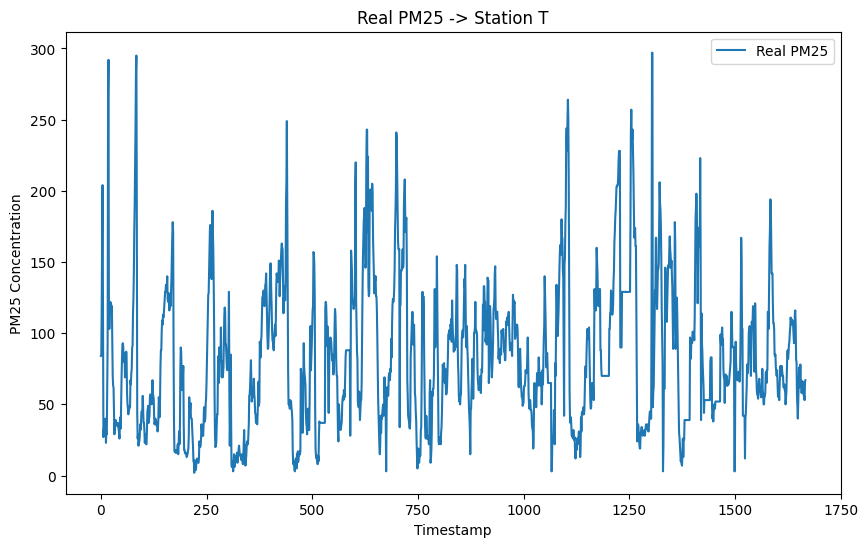

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_val, label='Real PM25')
# plt.plot(y_pred, label='Predicted PM25')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Real PM25 -> Station T')
plt.legend()
plt.show()

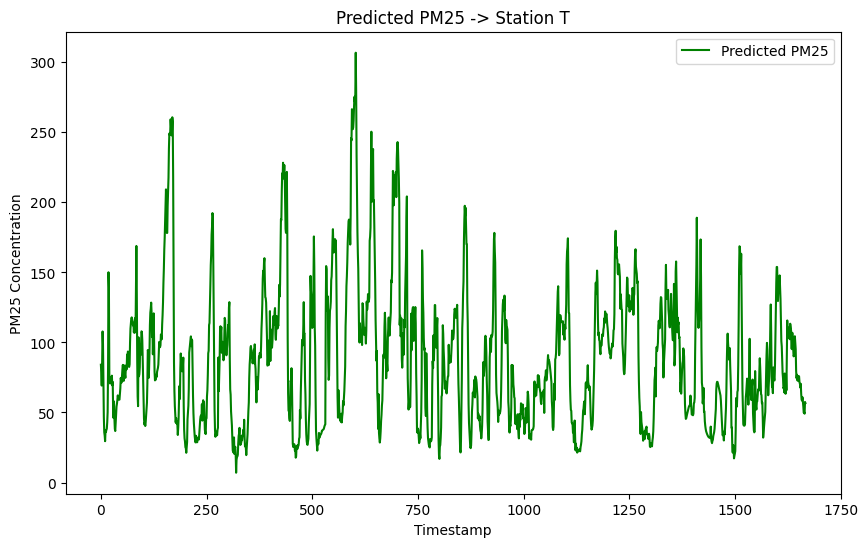

In [ ]:
plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Real PM25')
plt.plot(y_pred_val, label='Predicted PM25',c='g')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Predicted PM25 -> Station T')
plt.legend()
plt.show()

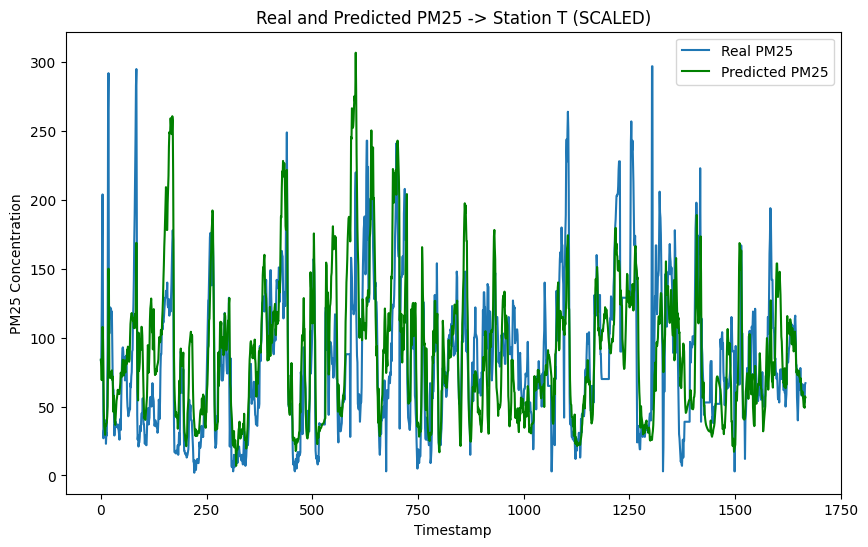

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_val, label='Real PM25')
plt.plot(y_pred_val, label='Predicted PM25', c='g')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Real and Predicted PM25 -> Station T (SCALED)')
plt.legend()
plt.show()


##STEP Size - > 60


Epoch 1/50
138/138 [==============================] - 4s 18ms/step - loss: 9227.7324 - mae: 69.8327
Epoch 2/50
138/138 [==============================] - 2s 18ms/step - loss: 5834.7549 - mae: 56.1227
Epoch 3/50
138/138 [==============================] - 2s 17ms/step - loss: 5753.3862 - mae: 55.5477
Epoch 4/50
138/138 [==============================] - 4s 26ms/step - loss: 5664.6318 - mae: 55.1954
Epoch 5/50
138/138 [==============================] - 2s 17ms/step - loss: 5616.8677 - mae: 54.9374
Epoch 6/50
138/138 [==============================] - 2s 17ms/step - loss: 5543.8618 - mae: 54.5943
Epoch 7/50
138/138 [==============================] - 2s 18ms/step - loss: 5510.7236 - mae: 54.3863
Epoch 8/50
138/138 [==============================] - 2s 17ms/step - loss: 5482.8794 - mae: 54.1191
Epoch 9/50
138/138 [==============================] - 4s 26ms/step - loss: 5450.0581 - mae: 53.9394
Epoch 10/50
138/138 [==============================] - 2s 18ms/step - loss: 5431.4360 - mae: 53.9179

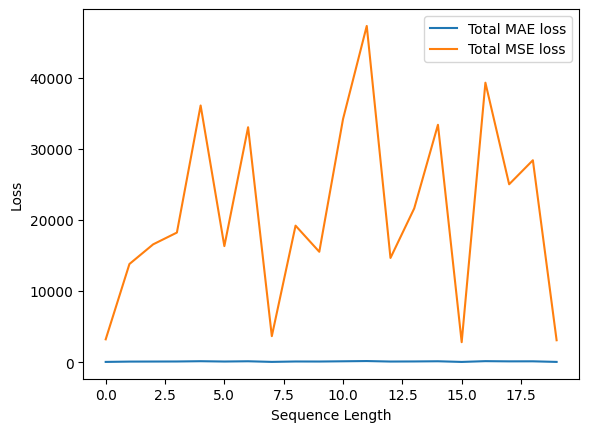

In [ ]:
"""
This code cell is mainly for searching best sequence length for each of step size
in range(step_size,step_size+20)

"""

predict_steps = 60
sequence_length_l = [i for i in range (predict_steps,predict_steps+20)]  # Number of past timestamps to consider

loss_mae_total=[]
loss_mse_total=[]

for sequence_length in sequence_length_l:
  X, y = [], []

  for i in range(len(features_scaled) - sequence_length - predict_steps + 1):
      X.append(features_scaled[i:(i + sequence_length), :])
      y.append(target.values[i + sequence_length:i + sequence_length + predict_steps])

  X, y = np.array(X), np.array(y)

  # Split the data into training and testing sets
  X_train = X
  y_train = y

  X_test, y_test = [], []

  for i in range(len(test_features_scaled) - sequence_length - predict_steps + 1):
      X_test.append(test_features_scaled[i:(i + sequence_length), :])
      y_test.append(test_target.values[i + sequence_length:i + sequence_length + predict_steps])

  X_test, y_test = np.array(X_test), np.array(y_test)

  model = Sequential()
  model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.2))
  model.add(Dense(units=predict_steps))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  # Display the model summary
  # model.summary()

  # Train the model and store the history
  history = model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=1)

  # Print the history, including losses at each epoch
  # print("Training history:")
  # print(history.history)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Display the finalized weights
  # for layer in model.layers:
  #     print(f"Weights for {layer.name}:")
  #     print(layer.get_weights()).
  mse = np.mean(np.square(y_pred - y_test))
  mae = np.mean(abs(y_pred - y_test))
  print(f'Sequence Length {sequence_length}\nMean Squared Error on Test Set: {mse}\nMean Absolurte Error on Test Set: {mae}')
  loss_mae_total.append(mae)
  loss_mse_total.append(mse)

plt.plot(loss_mae_total, label='Total MAE loss')
plt.plot(loss_mse_total, label='Total MSE loss')
plt.xlabel('Sequence Length')
plt.ylabel('Loss')
plt.legend()
plt.show()



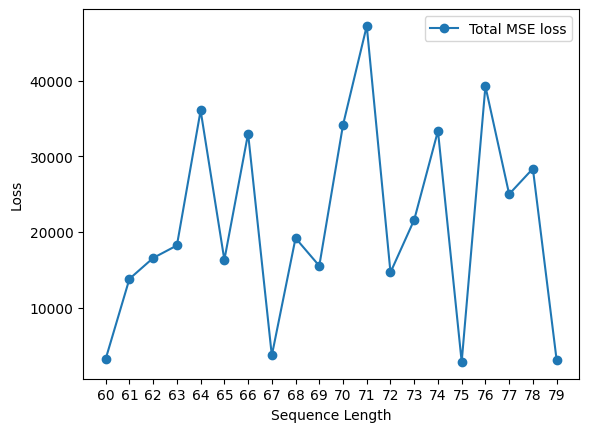

In [ ]:
x_values = [i for i in range(predict_steps,predict_steps+20)]

plt.plot(x_values, loss_mse_total, marker='o', label='Total MSE loss')
plt.xlabel('Sequence Length')
plt.ylabel('Loss')
plt.legend()
plt.xticks(x_values)
plt.show()

# plt.plot(loss_mae_total, label='Total MAE loss')
# plt.plot([i+5 for i in range(len(loss_mse_total))],loss_mse_total, label='Total MSE loss')
# plt.xlabel('Sequence Length')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()



In [ ]:
sequence_length = predict_steps+ loss_mse_total.index(min(loss_mse_total))  # Number of past timestamps to consider

X, y = [], []

for i in range(len(features_scaled) - sequence_length - predict_steps + 1):
    X.append(features_scaled[i:(i + sequence_length), :])
    y.append(target.values[i + sequence_length:i + sequence_length + predict_steps])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train = X
y_train = y


In [ ]:
len(X_train)

6873

In [ ]:
len(y_train)

6873

In [ ]:
X_test, y_test = [], []

for i in range(len(test_features_scaled) - sequence_length - predict_steps + 1):
    X_test.append(test_features_scaled[i:(i + sequence_length), :])
    y_test.append(test_target.values[i + sequence_length:i + sequence_length + predict_steps])

X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
len(X_test)

1595

In [ ]:
len(y_test)

1595

In [ ]:
X_test

array([[[0.        , 0.21621622, 0.60465116, ..., 0.13717113,
         0.02857143, 0.14184397],
        [0.        , 0.35135135, 0.58139535, ..., 0.15167529,
         0.02040816, 0.13120567],
        [0.        , 0.35135135, 0.58139535, ..., 0.19024061,
         0.0122449 , 0.12056738],
        ...,
        [0.        , 0.16216216, 0.88372093, ..., 0.12502811,
         0.04081633, 0.06382979],
        [0.0625    , 0.24324324, 0.88372093, ..., 0.12525298,
         0.04081633, 0.06028369],
        [0.0625    , 0.24324324, 0.88372093, ..., 0.12828873,
         0.04489796, 0.06028369]],

       [[0.        , 0.35135135, 0.58139535, ..., 0.15167529,
         0.02040816, 0.13120567],
        [0.        , 0.35135135, 0.58139535, ..., 0.19024061,
         0.0122449 , 0.12056738],
        [0.        , 0.35135135, 0.58139535, ..., 0.17360018,
         0.02040816, 0.06382979],
        ...,
        [0.0625    , 0.24324324, 0.88372093, ..., 0.12525298,
         0.04081633, 0.06028369],
        [0.0

In [ ]:
y_train

array([[ 37.,  44.,  29., ...,  57.,  57.,   1.],
       [ 44.,  29.,  21., ...,  57.,   1.,  80.],
       [ 29.,  21.,  21., ...,   1.,  80.,  80.],
       ...,
       [198., 207., 209., ...,  43.,  35.,  39.],
       [207., 209., 194., ...,  35.,  39.,  36.],
       [209., 194., 188., ...,  39.,  36.,  28.]])

In [ ]:
# Finding minimum and maximum values for y_test
min_v_test = np.min(y_test)
max_v_test = np.max(y_test)

print(min_v_test, max_v_test)

2.0 297.0


In [ ]:
# Finding minimum and maximum values for y_train
min_v = np.min(y_train)
max_v = np.max(y_train)
scale_down = (y_train - min_v) / (max_v - min_v)
scale_down = np.array(scale_down)
# scale_down

In [ ]:
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=predict_steps))  # Modify units to predict 7 steps ahead
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model and store the history
history = model.fit(X_train, scale_down, epochs=50, batch_size=50, verbose=1)

# Print the history, including losses at each epoch
print("Training history:")
print(history.history)

model.save_weights('T_city_60.h5')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the finalized weights
for layer in model.layers:
    print(f"Weights for {layer.name}:")
    print(layer.get_weights())


Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_126 (GRU)               (None, 50)                9450      
                                                                 
 dropout_126 (Dropout)       (None, 50)                0         
                                                                 
 dense_126 (Dense)           (None, 60)                3060      
                                                                 
Total params: 12510 (48.87 KB)
Trainable params: 12510 (48.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
138/138 [==============================] - 5s 28ms/step - loss: 0.0199 - mae: 0.1018
Epoch 2/50
138/138 [==============================] - 3s 23ms/step - loss: 0.0145 - mae: 0.0879
Epoch 3/50
138/138 [==============================] - 3s 21ms/step - loss: 0.0136 - mae:

In [ ]:
len(y_pred)

1595

In [ ]:
y_pred_scaledup = [min_v+i*(max_v-min_v) for i in y_pred]

In [ ]:
y_pred

array([[0.10632298, 0.1134892 , 0.12219195, ..., 0.28185058, 0.28532535,
        0.29116902],
       [0.10261592, 0.10914822, 0.11728476, ..., 0.2699517 , 0.27356964,
        0.2795432 ],
       [0.10300003, 0.10990478, 0.11798957, ..., 0.26895797, 0.27230805,
        0.27824748],
       ...,
       [0.23320009, 0.23571125, 0.23361248, ..., 0.15582658, 0.1506572 ,
        0.14829428],
       [0.22445609, 0.2242116 , 0.22036254, ..., 0.15304156, 0.14978348,
        0.14911953],
       [0.21158557, 0.2103548 , 0.2065855 , ..., 0.15061776, 0.14969142,
        0.15106028]], dtype=float32)

In [ ]:
len(y_pred_scaledup[0])

60

In [ ]:
y_pred

array([[0.10632298, 0.1134892 , 0.12219195, ..., 0.28185058, 0.28532535,
        0.29116902],
       [0.10261592, 0.10914822, 0.11728476, ..., 0.2699517 , 0.27356964,
        0.2795432 ],
       [0.10300003, 0.10990478, 0.11798957, ..., 0.26895797, 0.27230805,
        0.27824748],
       ...,
       [0.23320009, 0.23571125, 0.23361248, ..., 0.15582658, 0.1506572 ,
        0.14829428],
       [0.22445609, 0.2242116 , 0.22036254, ..., 0.15304156, 0.14978348,
        0.14911953],
       [0.21158557, 0.2103548 , 0.2065855 , ..., 0.15061776, 0.14969142,
        0.15106028]], dtype=float32)

In [ ]:
y_test

array([[ 30.,  26.,  38., ...,  46.,  37.,  37.],
       [ 26.,  38.,  41., ...,  37.,  37.,  31.],
       [ 38.,  41.,  33., ...,  37.,  31.,  23.],
       ...,
       [106., 109., 107., ...,  68.,  68.,  73.],
       [109., 107., 105., ...,  68.,  73.,  81.],
       [107., 105.,  98., ...,  73.,  81.,  89.]])

In [ ]:
len(y_test)

1595

In [ ]:
mse = 0
for i in range(len(y_test)):
  mse += np.mean(np.square(y_pred_scaledup[i] - y_test[i]))

mse /= len(y_test)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 11838.50660523416


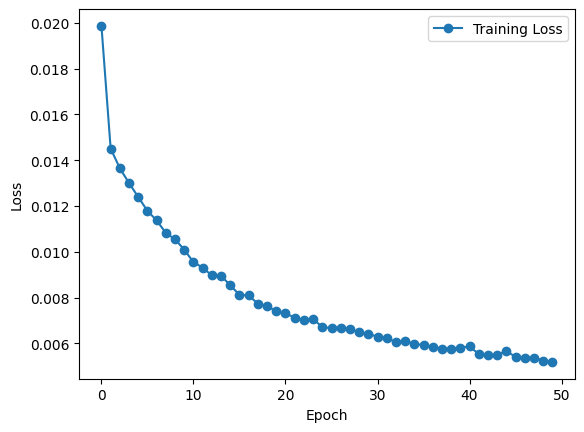

In [ ]:
# Evaluate the model (you may need to adjust this based on your specific evaluation metrics)
# mse = np.mean(np.square(y_pred_scaledup - y_test))
# print(f'Mean Squared Error on Test Set: {mse}')

# Access loss for each epoch
train_loss = history.history['loss']

# Plot the training and validation loss over epochs
plt.plot(train_loss, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
y_test_scaleD=[(i-min_v_test)/(max_v_test-min_v_test) for i in y_test]

In [ ]:
mse = np.mean(np.square(y_pred - y_test_scaleD))
mae = np.mean(abs(y_pred - y_test_scaleD))
print(f'Mean Squared Error on Test Set -> scaled 0 to 1 : {mse}\nMean Absolurte Error on Test Set -> scaled 0 to 1 : {mae}')
# print(f'Mean Squared Error on Test Set : {mse}\nMean Absolurte Error on Test Set : {mae}')

Mean Squared Error on Test Set -> scaled 0 to 1 : 0.041105351161579325
Mean Absolurte Error on Test Set -> scaled 0 to 1 : 0.15026022861080035


In [ ]:
y_test_val=[i[0] for i in y_test]
y_pred_val=[i[0] for i in y_pred_scaledup]

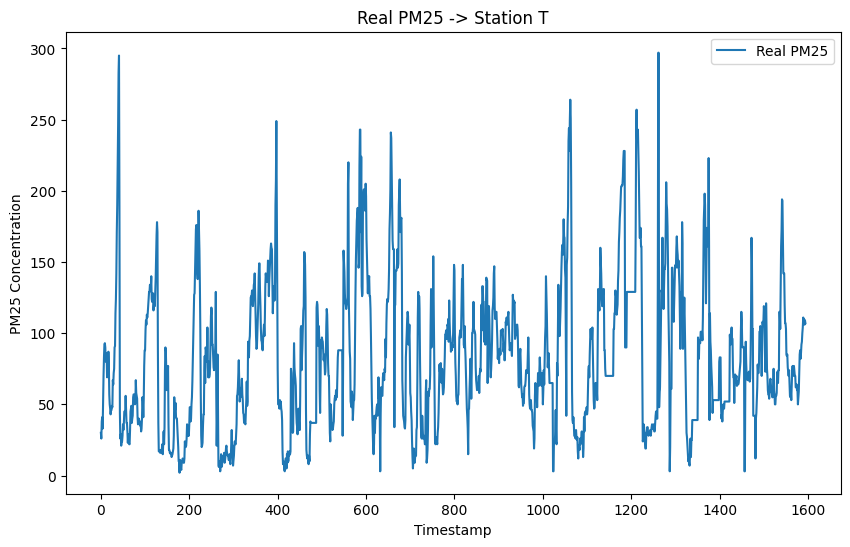

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_val, label='Real PM25')
# plt.plot(y_pred, label='Predicted PM25')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Real PM25 -> Station T')
plt.legend()
plt.show()

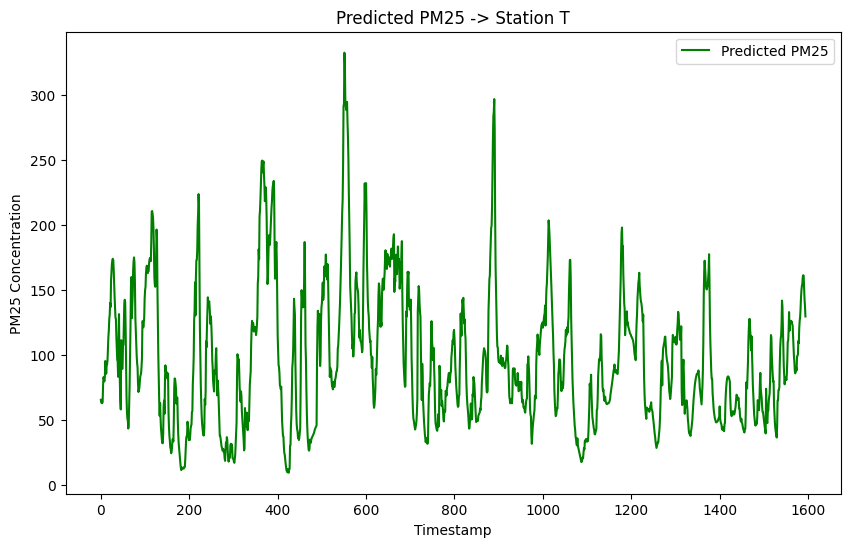

In [ ]:
plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Real PM25')
plt.plot(y_pred_val, label='Predicted PM25',c='g')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Predicted PM25 -> Station T')
plt.legend()
plt.show()

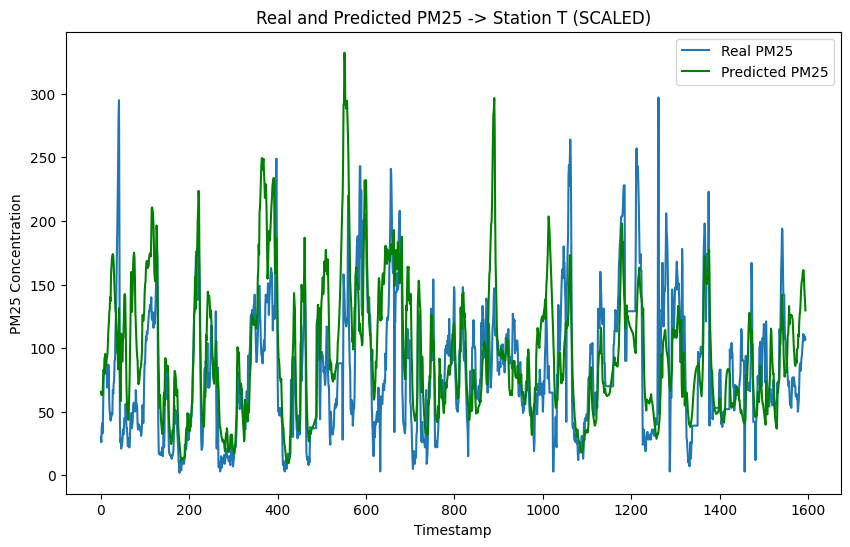

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_val, label='Real PM25')
plt.plot(y_pred_val, label='Predicted PM25', c='g')
plt.xlabel('Timestamp')
plt.ylabel('PM25 Concentration')
plt.title('Real and Predicted PM25 -> Station T (SCALED)')
plt.legend()
plt.show()
